# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 5</span>

In this notebook we want to resort to the Metropolis algorithm to sample $|\Psi_{1,0,0}(x,y,z)|^2$ and $|\Psi_{2,1,0}(x,y,z)|^2$ **in Cartesian coordinates** using, initially, a uniform transition probability $T(\vec{x}|\vec{y})$ and then a multivariate normal transition probability $T(\vec{x}|\vec{y})$, i.e. a Gaussian for each coordinate.  We want to use the sampled positions to estimate $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ in both cases, recurring to data blocking and giving an estimate of the statistical uncertainties.


We consider the simple case of a non-relativistic single particle, without spin, in three spatial dimensions. The state of such a particle is completely described by its wave function, $\Psi(\vec{r},t)$, where $\vec{r}$ is position and $t$ is time.

For one spinless particle, if the wave function is interpreted as a probability amplitude, the square modulus of the wave function, $|\Psi(\vec{r},t)|^2$, is interpreted as the probability density that the particle is at $\vec{r}$ at time $t$.

In particular, the wave function of the ground state 1s is:

$$
\Psi_{1,0,0}(r,\theta,\phi)=
\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0} 
$$

and the wave function of the excited state 2p is:

$$
\Psi_{2,1,0}(r,\theta,\phi)=
\frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta)
$$

where $a_0=4\pi\epsilon_0\hbar^2/m_e e^2=0.0529$ nm is the Bohr radius.

The expectation values for the radius ( the distance of the electron from the nucleus) turn out to be exactly:
$$
\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0
\quad
\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 a_0.
$$
</span>

Since we want to sample the wave functions in Cartesian coordinates, we rewrite the relations showed above  in order to find the probability density, obtaining:
$$
|\Psi_{1,0,0}(x,y,z)|^2 =
\frac{e^{-\frac{ 2 \sqrt{(x^2+y^2+z^2)}}{a_0}}}{a_0^{3}\pi}
$$

for the state 1s and:

$$
|\Psi_{2,1,0}(x,y,z)|^2 = \frac {z^2
 e^{-\frac{(x^2+y^2+z^2)}{a_0}}}{32 a_0^{5}\pi}
$$

for the state 2p.

### Uniform Sampling 

First of all we start executing an equilibration process of 1510 steps, during which the particle get nearer to the point of maximal probability. Such point is (0, 0, 0) for the ground state and (0, 0, $\pm$2) for the state 2p.
The choice of the number of steps could seem strange; the reason is that we have to balance the program and the parameters in order to satisfy the empirical rule of the acceptance rate equal to $50\%$. In the first version of the code there was a bug for which we evaluated the istantaneous value of $\alpha$ and not the mean. Due to this fact we set the number of steps to $1510$, thinking erroneously that with such number we had the desired acceptance. Once we fixed the code, we left that value, being an acceptable number of steps for the equilibration procedure.
In particular, together with the number of steps, we also set the lenghts of the steps. In the case of uniform sampling we have:
1. Step lenght **delta** for $\psi_{100} = 1.2245$
2. Step lenght **delta** for $\psi_{210} = 2.9699$


Such choice is made evaluating the mean of the acceptance rate $\alpha= \min(1,\frac{p(\vec{x})}{p(\vec{y})})$ and setting the parameter in order to have $\langle \alpha \rangle \simeq 0.5$. 

It is good to underline the fact that acceptance rate $\alpha$ depends only on the ratio of the probability distribution valued in two different points. This is very important because allows us to neglect the normalization since it simplifies.

What we have just presented is the great advantage of Metropolis. In fact, it is not necessary to know the normalization of the probability distribution to be sampled.

We decide to start equilibrating the system setting the position of the electron near, but not on, the expected value of position. In particular we set 
1. starting position $\psi_{100} = (0.2, 0.2, 0.2)$
2. starting position $\psi_{210} = (1.2, 1.2, 1.2)$

This choice is made since we know that the Metropolis algorithm is a Markovian process and that the probability distribution we want to sample is the limit probability distribution reached after an infinite number of steps.
For these reasons a good choice for the starting point is a position with a non-null probability of the probability distribution we want to sample.

Finally we use the blocking method using $1000000$ throws divided in $100$ blocks of $10000$ throws each.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import re

#Get information from file about the pseudo random generation
file = open("data/Unif/info_ex5.1.dat", "r")
for i in file.readlines():
    print(i)
file.close()

file = open("data/Unif/info_ex5.1.dat", "r")
file = file.read()
s = re.findall(r"[-+]?\d*\.\d+|\d+", file)

Number of blocks: 100

Number of throws: 1000000

Number of throws per block: 10000



After the equilibration procedure, we start with the sampling and obtain the following estimate for the radius:

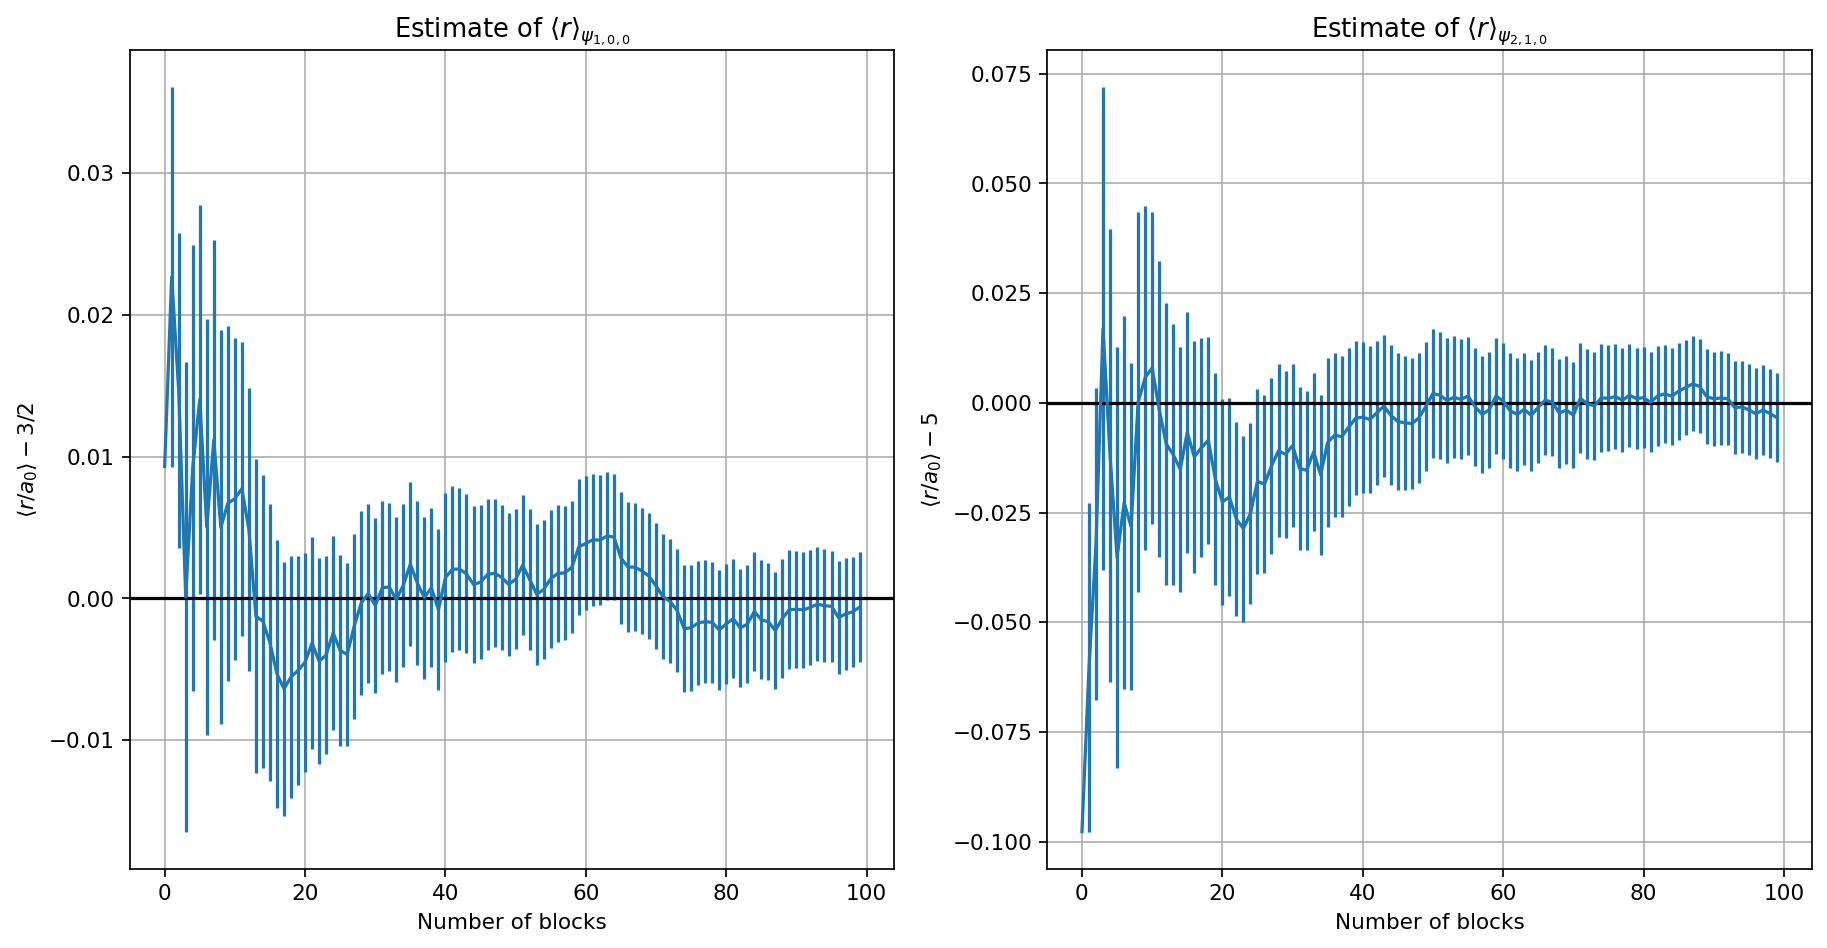

In [2]:
ave_r100_unif,err_r100_unif=np.loadtxt("data/Unif/r_100.dat", usecols=(0,1), dtype="float,float", unpack=True)
ave_r210_unif,err_r210_unif=np.loadtxt("data/Unif/r_210.dat", usecols=(0,1), dtype="float,float", unpack=True)

x = range(int(s[0]))
fig, pp=plt.subplots(1,2, figsize=(14,7), dpi=155)

pp[0].axhline(0, 0,1, color="black",linestyle="solid")
pp[1].axhline(0, 0,1, color="black",linestyle="solid")

pp[0].errorbar(x,ave_r100_unif - 3/2,yerr=err_r100_unif)
pp[1].errorbar(x,ave_r210_unif - 5,yerr=err_r210_unif)

pp[0].set_title(r"Estimate of $\langle r \rangle_{\psi_{1,0,0}}$")
pp[1].set_title(r"Estimate of $\langle r \rangle_{\psi_{2,1,0}}$")

pp[0].set_xlabel(r"Number of blocks")
pp[0].set_ylabel(r"$\langle r/a_0 \rangle-3/2$")
pp[0].grid(True)

pp[1].set_xlabel(r"Number of blocks")
pp[1].set_ylabel(r"$\langle r/a_0 \rangle-5$")
pp[1].grid(True)
 
plt.show()

Exploiting the knowledge about the values of the radius, we translate the results, making them to converge to zero.
In particular, we obtain the following values:
$$ \langle r \rangle_{100} = 1.499 \pm 0.004 \, \, a_0$$ $$\langle r \rangle_{100} = 4.997 \pm 0.010  \, \, a_0$$

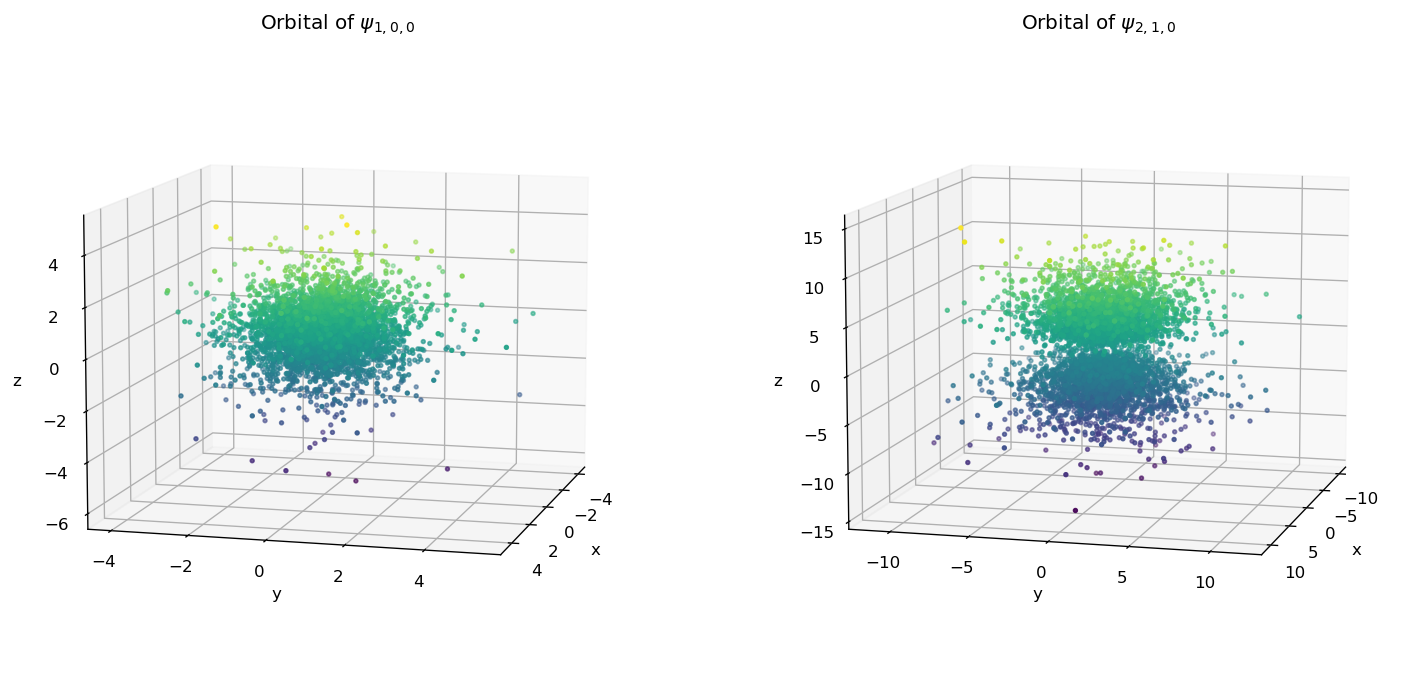

In [3]:
x_100,y_100,z_100 = np.loadtxt("data/Unif/positions_100.dat", usecols=(0,1,2), dtype="float,float,float", unpack=True)
x_210,y_210,z_210 = np.loadtxt("data/Unif/positions_210.dat", usecols=(0,1,2), dtype="float,float,float", unpack=True)

fig =plt.figure(figsize=(15,8),dpi=120)
pp_100 = fig.add_subplot(121, projection='3d')
pp_210 = fig.add_subplot(122, projection='3d')

pp_100.scatter(x_100,y_100,z_100, c=z_100, marker='.')
pp_100.set_xlabel('x')
pp_100.set_ylabel('y')
pp_100.set_zlabel('z')
pp_100.view_init(10, 15)

pp_210.scatter(x_210,y_210,z_210, c=z_210, marker='.')
pp_210.set_xlabel('x')
pp_210.set_ylabel('y')
pp_210.set_zlabel('z')
pp_210.view_init(10, 15)

pp_100.set_title(r"Orbital of $\psi_{1,0,0}$")
pp_210.set_title(r"Orbital of $\psi_{2, 1,0}$")

plt.show()

In the plots above we show $5000$ points representing the orbital of the hydrogen atom. In particular, on the left, we have a $1s$ orbital (it has a spherical symmetry) representing the ground state and, on the right, a $2p_{z}$ orbital (it is symmetric with respect to the $z=0$ plane) representing the excited state.

### Gaussian Sampling

In the Gaussian case we follow the same procedure presented at the previous point. First of all we start executing an equilibration process of $1510$ steps and then we set the lenghts of the steps always asking for $\langle \alpha \rangle = 0.5$. In the case of Gaussian sampling we have:
1. Step lenght **sigma** for $\psi_{100} = 0.759$
2. Step lenght **sigma** for $\psi_{210} = 1.874$


Such choice is made evaluating the mean of the acceptance rate $\alpha= \min(1,\frac{p(\vec{x})}{p(\vec{y})})$ and setting the parameter in order to have $\langle \alpha \rangle \simeq 0.5$. 

We decide to start equilibrating the system setting the position of the electron near, but not on, the expected value of position. In particular we set 
1. starting position $\psi_{100} = (0.2, 0.2, 0.2)$
2. starting position $\psi_{210} = (1.2, 1.2, 1.2)$

Finally we use, as before, the blocking method using $1000000$ throws divided in $100$ blocks of $10000$ throws each.

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import re

#Get information from file about the pseudo random generation
file = open("data/Gauss/info_ex5.1.dat", "r")
for i in file.readlines():
    print(i)
file.close()

file = open("data/Gauss/info_ex5.1.dat", "r")
file = file.read()
s = re.findall(r"[-+]?\d*\.\d+|\d+", file)

Number of blocks: 100

Number of throws: 1000000

Number of throws per block: 10000



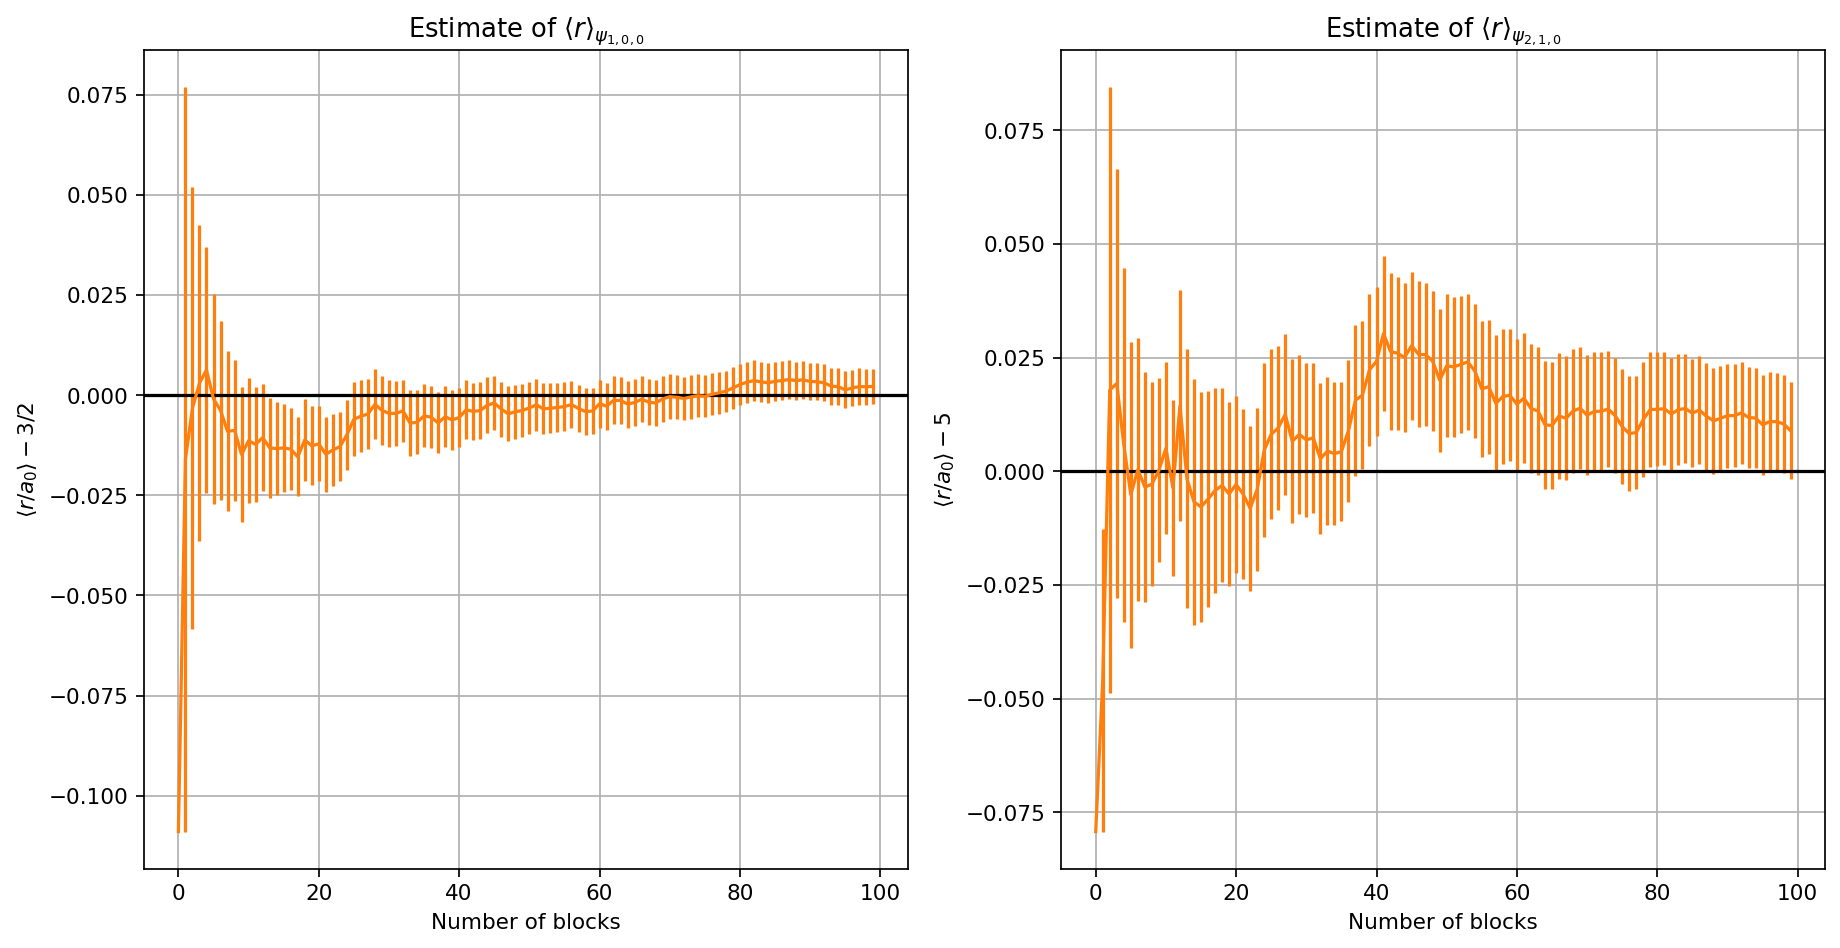

In [5]:
ave_r100_gauss,err_r100_gauss=np.loadtxt("data/Gauss/r_100.dat", usecols=(0,1), dtype="float,float", unpack=True)
ave_r210_gauss,err_r210_gauss=np.loadtxt("data/Gauss/r_210.dat", usecols=(0,1), dtype="float,float", unpack=True)

x = range(int(s[0]))

fig, pp=plt.subplots(1,2, figsize=(14,7), dpi=155)

pp[0].axhline(0, 0,1, color="black",linestyle="solid")
pp[1].axhline(0, 0,1, color="black",linestyle="solid")

pp[0].errorbar(x,ave_r100_gauss - 3/2,yerr=err_r100_gauss, color = "C1")
pp[1].errorbar(x,ave_r210_gauss - 5,yerr=err_r210_gauss, color = "C1")

pp[0].set_title(r"Estimate of $\langle r \rangle_{\psi_{1,0,0}}$")
pp[1].set_title(r"Estimate of $\langle r \rangle_{\psi_{2,1,0}}$")

pp[0].set_xlabel(r"Number of blocks")
pp[0].set_ylabel(r"$\langle r/a_0 \rangle-3/2$")
pp[0].grid(True)

pp[1].set_xlabel(r"Number of blocks")
pp[1].set_ylabel(r"$ \langle r/a_0 \rangle -5$")
pp[1].grid(True)

    
plt.show()

Exploiting the knowledge about the values of the radius, we translate the results, making them to converge to zero.
In particular, we obtain the following values:
$$ \langle r \rangle_{100} = 1.502 \pm 0.004 \, \, a_0$$ $$\langle r \rangle_{100} = 5.009 \pm 0.011  \, \, a_0$$

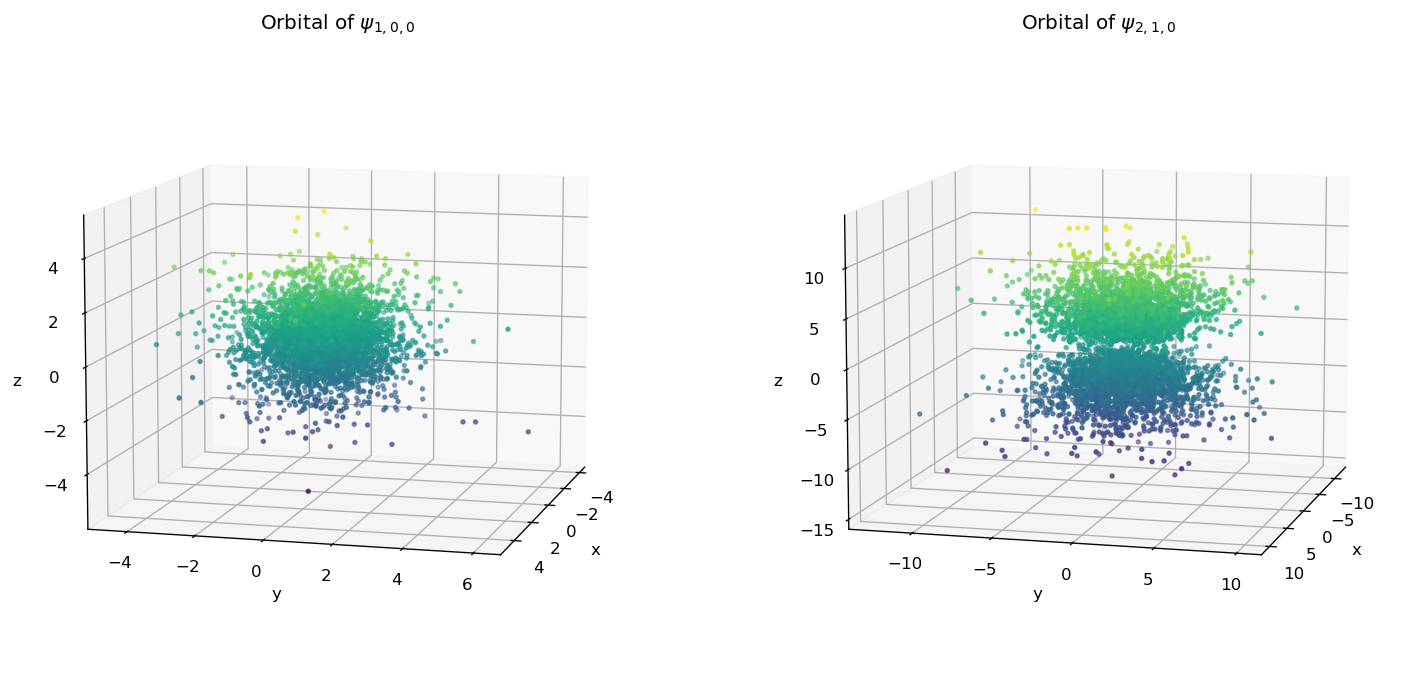

In [6]:
x_100,y_100,z_100 = np.loadtxt("data/Gauss/positions_100.dat", usecols=(0,1,2), dtype="float,float,float", unpack=True)
x_210,y_210,z_210 = np.loadtxt("data/Gauss/positions_210.dat", usecols=(0,1,2), dtype="float,float,float", unpack=True)

fig =plt.figure(figsize=(15,8),dpi=120)
pp_100 = fig.add_subplot(121, projection='3d')
pp_210 = fig.add_subplot(122, projection='3d')

pp_100.scatter(x_100,y_100,z_100, c=z_100, marker='.')
pp_100.set_xlabel('x')
pp_100.set_ylabel('y')
pp_100.set_zlabel('z')
pp_100.view_init(10, 15)

pp_210.scatter(x_210,y_210,z_210,  c=z_210, marker='.')
pp_210.set_xlabel('x')
pp_210.set_ylabel('y')
pp_210.set_zlabel('z')
pp_210.view_init(10, 15)

pp_100.set_title(r"Orbital of $\psi_{1,0,0}$")
pp_210.set_title(r"Orbital of $\psi_{2, 1,0}$")

plt.show()

Also for the Gaussian case we present the plots showing the orbitals. They show $5000$ points representing the orbital of the hydrogen atom. In particular, on the left, we have a $1s$ orbital (it has a spherical symmetry) representing the ground state and, on the right, a $2p_{z}$ orbital (it is symmetric with respect to the $z=0$ plane) representing the excited state.

In the end we can compare the two samplings, observing that there are no big differences:


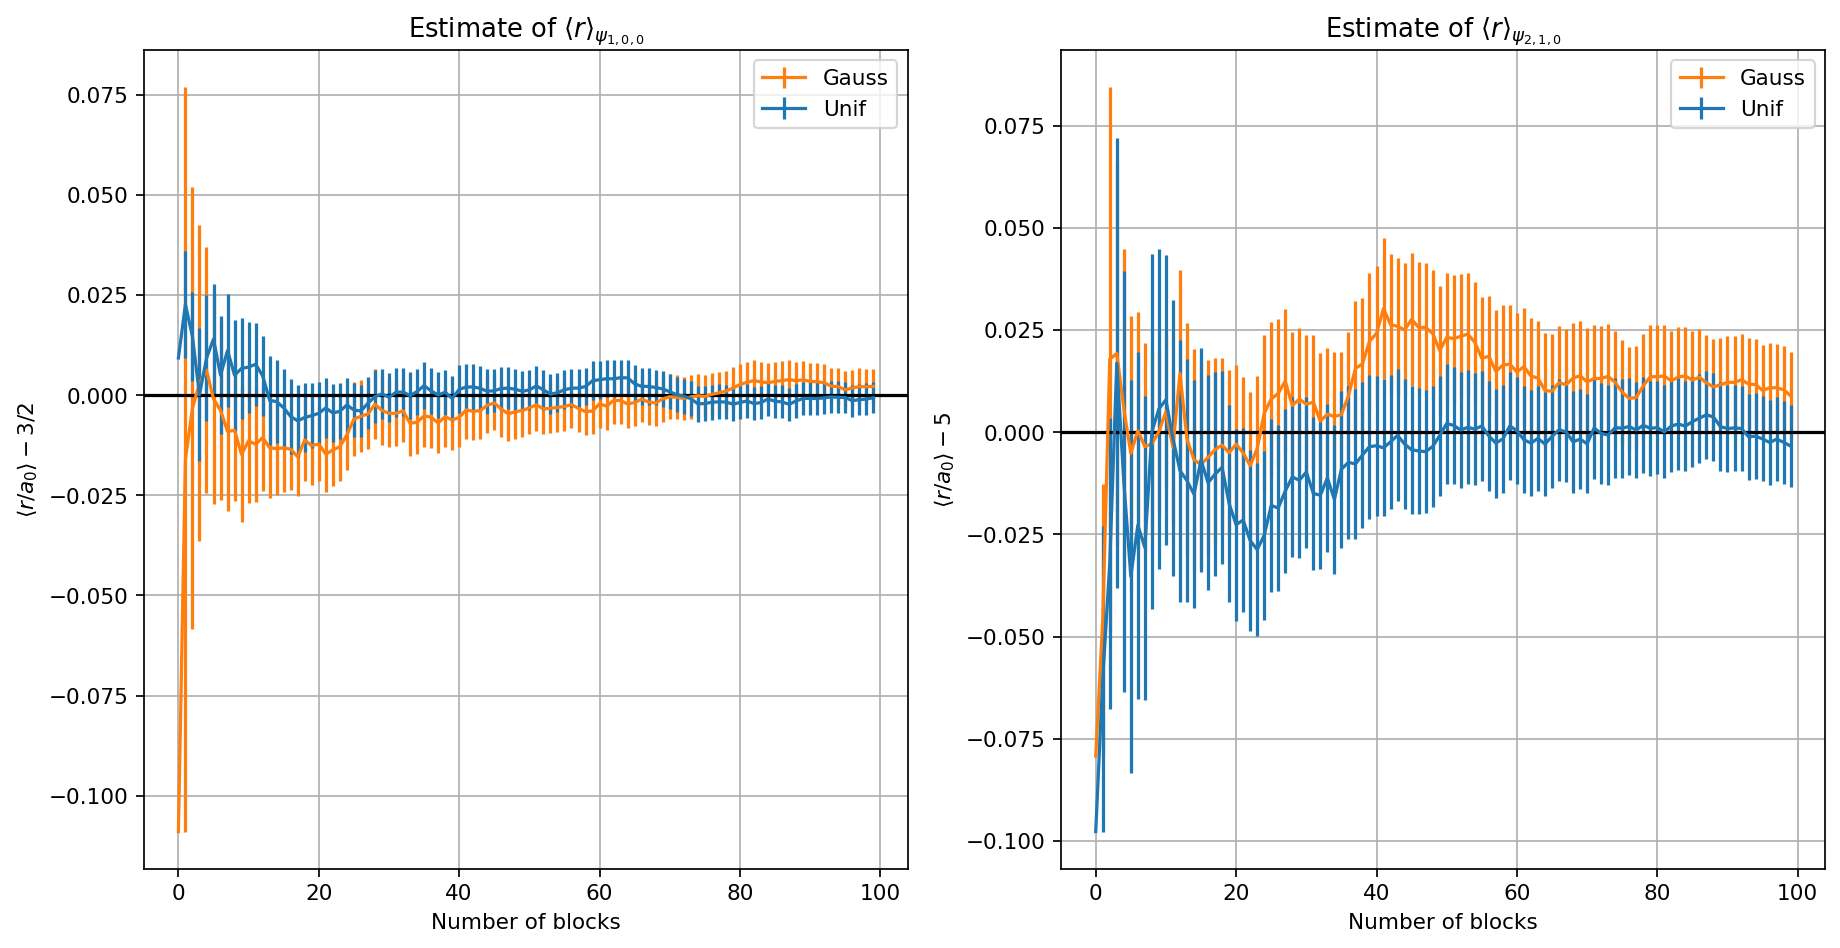

In [7]:
fig, pp=plt.subplots(1,2, figsize=(14,7), dpi=155)

pp[0].axhline(0, 0,1, color="black",linestyle="solid")
pp[1].axhline(0, 0,1, color="black",linestyle="solid")

pp[0].errorbar(x,ave_r100_gauss - 3/2,yerr=err_r100_gauss, color = "C1", label = "Gauss")
pp[1].errorbar(x,ave_r210_gauss - 5,yerr=err_r210_gauss, color = "C1", label = "Gauss")

pp[0].errorbar(x,ave_r100_unif - 3/2,yerr=err_r100_unif, label = "Unif")
pp[1].errorbar(x,ave_r210_unif - 5,yerr=err_r210_unif, label = "Unif")


pp[0].set_title(r"Estimate of $\langle r \rangle_{\psi_{1,0,0}}$")
pp[1].set_title(r"Estimate of $\langle r \rangle_{\psi_{2,1,0}}$")

pp[0].set_xlabel(r"Number of blocks")
pp[0].set_ylabel(r"$ \langle r/a_0 \rangle-3/2$")
pp[0].grid(True)
pp[0].legend()

pp[1].set_xlabel(r"Number of blocks")
pp[1].set_ylabel(r"$\langle r/a_0 \rangle-5$")
pp[1].grid(True)
pp[1].legend()
 
plt.show()

The lack of differences between the results obtained per via of the two samplings method si due to the fact that the Metropolis algorithm converges to the distribution probability independently on the choice of the $T(\vec{x}|\vec{y})$.

### Starting point far from origin


We also inspect the case in which we choose starting point far from origin: 
1. starting position $\psi_{100} = (40, 30, 2)$
2. starting position $\psi_{210} = (40, 30, 2)$

#### Uniform sampling

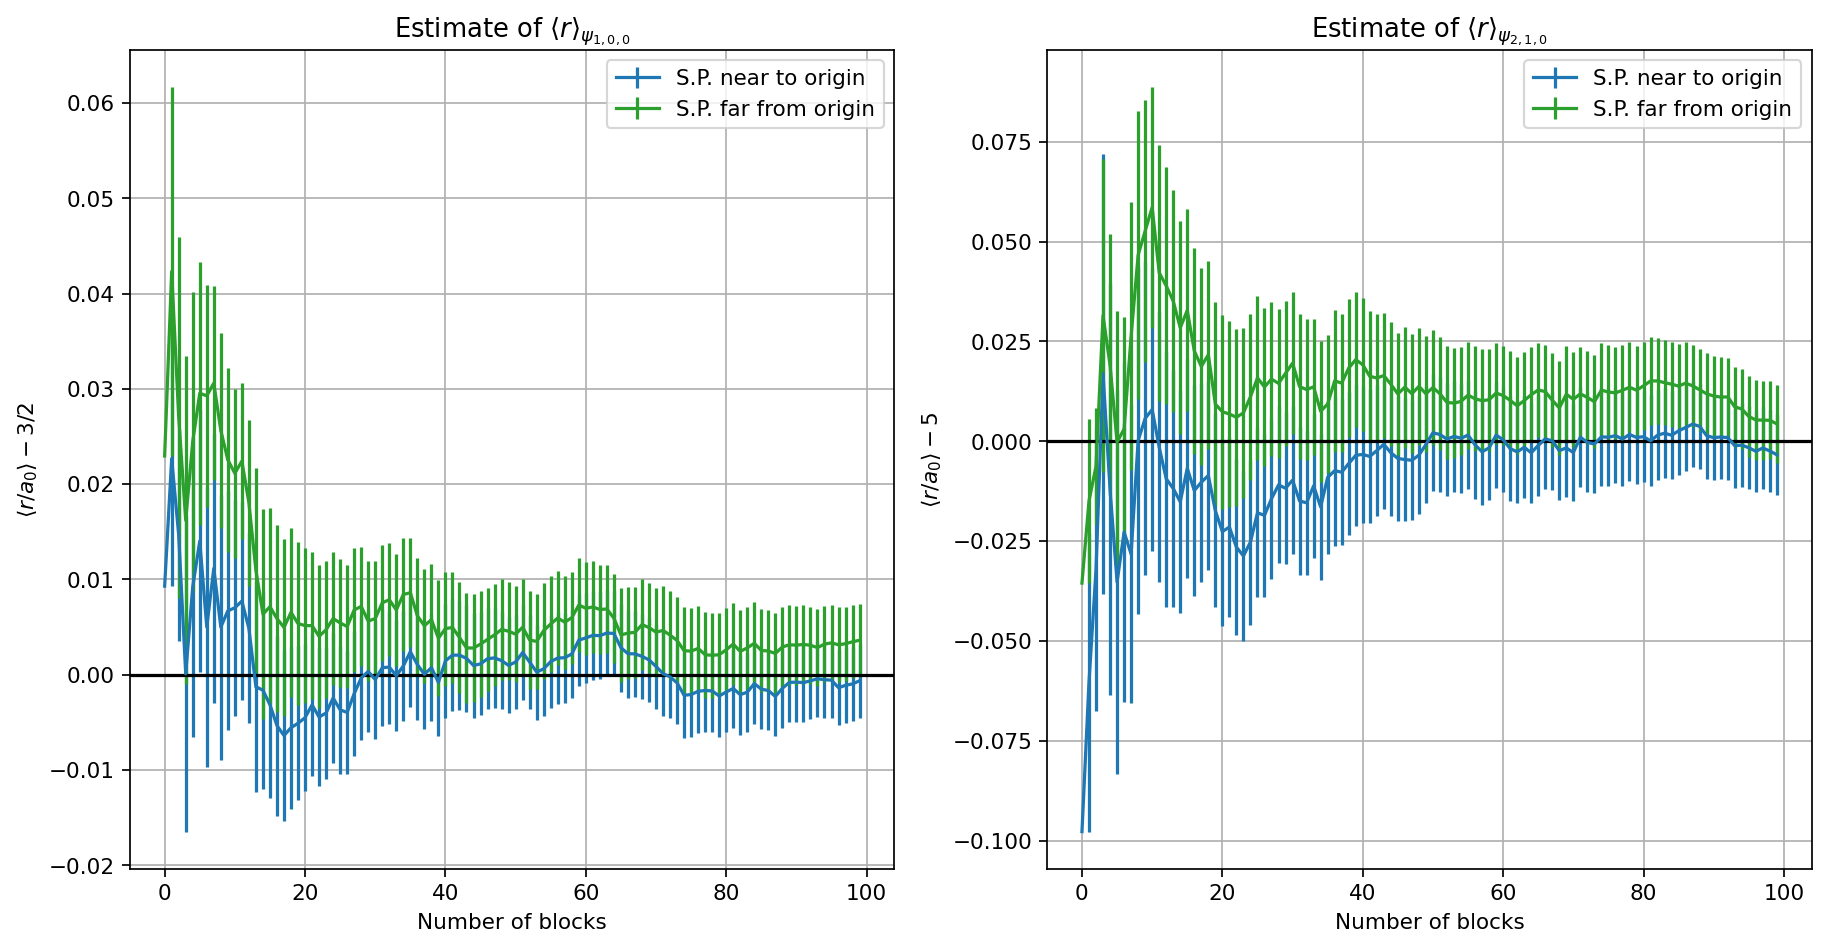

In [8]:
ave_r100_unif,err_r100_unif=np.loadtxt("data/Unif/r_100.dat", usecols=(0,1), dtype="float,float", unpack=True)
ave_r210_unif,err_r210_unif=np.loadtxt("data/Unif/r_210.dat", usecols=(0,1), dtype="float,float", unpack=True)
ave_r100_unif_far,err_r100_unif_far=np.loadtxt("data_for_far_eq/Unif/r_100.dat", usecols=(0,1), dtype="float,float", unpack=True)
ave_r210_unif_far,err_r210_unif_far=np.loadtxt("data_for_far_eq/Unif/r_210.dat", usecols=(0,1), dtype="float,float", unpack=True)

x = range(int(s[0]))

fig, pp=plt.subplots(1,2, figsize=(14,7), dpi=155)

pp[0].axhline(0, 0,1, color="black",linestyle="solid")
pp[1].axhline(0, 0,1, color="black",linestyle="solid")

pp[0].errorbar(x,ave_r100_unif - 3/2,yerr=err_r100_unif, label = "S.P. near to origin")
pp[0].errorbar(x,ave_r100_unif_far - 3/2,yerr=err_r100_unif_far, color = "C2", label = "S.P. far from origin")
pp[1].errorbar(x,ave_r210_unif - 5,yerr=err_r210_unif, label = "S.P. near to origin")
pp[1].errorbar(x,ave_r210_unif_far - 5,yerr=err_r210_unif_far, color = "C2", label = "S.P. far from origin")

pp[0].set_title(r"Estimate of $\langle r \rangle_{\psi_{1,0,0}}$")
pp[1].set_title(r"Estimate of $\langle r \rangle_{\psi_{2,1,0}}$")

pp[0].set_xlabel(r"Number of blocks")
pp[0].set_ylabel(r"$\langle r/a_0 \rangle-3/2$")
pp[0].grid(True)
pp[0].legend()

pp[1].set_xlabel(r"Number of blocks")
pp[1].set_ylabel(r"$ \langle r/a_0 \rangle -5$")
pp[1].grid(True)
pp[1].legend()

    
plt.show()

#### Gaussian sampling

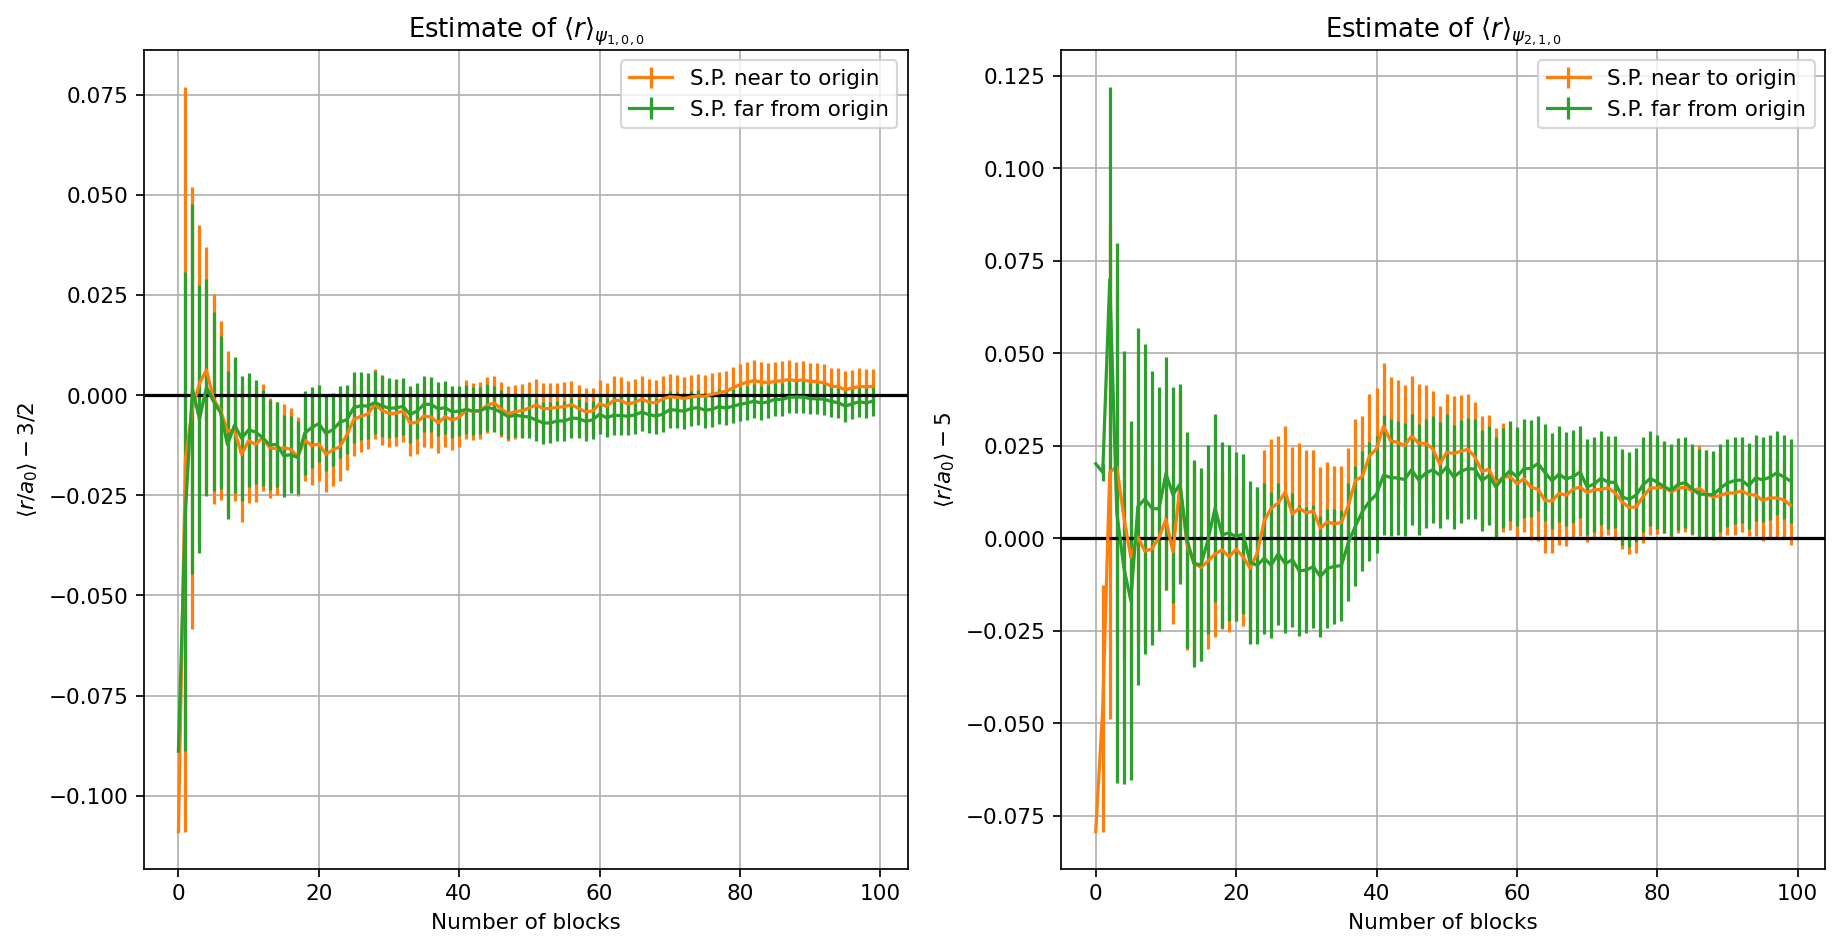

In [9]:
ave_r100_gauss,err_r100_gauss=np.loadtxt("data/Gauss/r_100.dat", usecols=(0,1), dtype="float,float", unpack=True)
ave_r210_gauss,err_r210_gauss=np.loadtxt("data/Gauss/r_210.dat", usecols=(0,1), dtype="float,float", unpack=True)
ave_r100_gauss_far,err_r100_gauss_far=np.loadtxt("data_for_far_eq/Gauss/r_100.dat", usecols=(0,1), dtype="float,float", unpack=True)
ave_r210_gauss_far,err_r210_gauss_far=np.loadtxt("data_for_far_eq/Gauss/r_210.dat", usecols=(0,1), dtype="float,float", unpack=True)

x = range(int(s[0]))

fig, pp=plt.subplots(1,2, figsize=(14,7), dpi=155)

pp[0].axhline(0, 0,1, color="black",linestyle="solid")
pp[1].axhline(0, 0,1, color="black",linestyle="solid")

pp[0].errorbar(x,ave_r100_gauss - 3/2,yerr=err_r100_gauss, color = "C1", label = "S.P. near to origin")
pp[0].errorbar(x,ave_r100_gauss_far - 3/2,yerr=err_r100_gauss_far, color = "C2", label = "S.P. far from origin" )
pp[1].errorbar(x,ave_r210_gauss - 5,yerr=err_r210_gauss, color = "C1", label = "S.P. near to origin")
pp[1].errorbar(x,ave_r210_gauss_far - 5,yerr=err_r210_gauss_far, color = "C2", label = "S.P. far from origin")

pp[0].set_title(r"Estimate of $\langle r \rangle_{\psi_{1,0,0}}$")
pp[1].set_title(r"Estimate of $\langle r \rangle_{\psi_{2,1,0}}$")

pp[0].set_xlabel(r"Number of blocks")
pp[0].set_ylabel(r"$\langle r/a_0 \rangle-3/2$")
pp[0].grid(True)
pp[0].legend()

pp[1].set_xlabel(r"Number of blocks")
pp[1].set_ylabel(r"$ \langle r/a_0 \rangle -5$")
pp[1].grid(True)
pp[1].legend()

    
plt.show()

We can observe that there are not big differences in the results obtained and we obtain the expected value.

## Dimension of data blocking 

As we said before, we use data blocking analyzing $100$ blocks made of $10000$ throws each. 
Trying to change these numbers, in order to evaluate the incidence of the dimension of blocks on the uncertainties, we observe that only going down to blocks made of $30$ throws or less there is a sensible change in the uncertainties. In particular the errors are smaller and this effect could be due to the correlations between the throws contained in different blocks.